<a href="https://colab.research.google.com/github/victoruwazurike1/Hamoye_Internship_Notebooks/blob/main/Hamoye_Neural_Network_Image_Recognition_Object_Detection_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [23]:
print(f'Training data: {train_images.shape}, {train_labels.shape}')
print(f'Training data: {test_images.shape}, {test_labels.shape}')
class_labels = np.unique(train_labels)
print(f'There are {len(class_labels)} classes in the dataset. They are {class_labels}')

Training data: (60000, 28, 28), (60000,)
Training data: (10000, 28, 28), (10000,)
There are 10 classes in the dataset. They are [0 1 2 3 4 5 6 7 8 9]


In [26]:
print(train_images.shape[0])
print(train_images.shape[1])
print(train_images.shape[2])
print(train_images.shape)

60000
28
28
(60000, 28, 28)


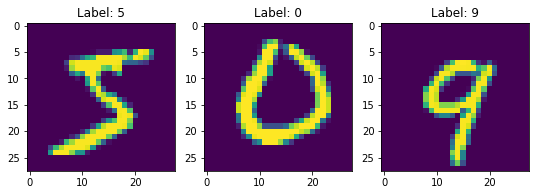

In [27]:
# Let us visualize the images
plt.figure(figsize=(9, 6))

plt.subplot(1, 3, 1)
plt.imshow(train_images[0])
plt.title(f'Label: {train_labels[0]}')

plt.subplot(1, 3, 2)
plt.imshow(train_images[2500])
plt.title(f'Label: {train_labels[2500]}')

plt.subplot(1, 3, 3)
plt.imshow(test_images[12])
plt.title(f'Label: {test_labels[12]}')

plt.show()

In [28]:
# Now we are going to scale the data so it will be within the range of 0 and 1
# Dividing the data by 255 is going to help us achieve this 
train_images = train_images / 255
test_images = test_images / 255

In [30]:
train_images.shape

(60000, 28, 28)

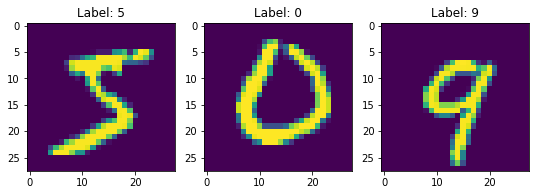

In [31]:
plt.figure(figsize=(9, 6))

plt.subplot(1, 3, 1)
plt.imshow(train_images[0])
plt.title(f'Label: {train_labels[0]}')

plt.subplot(1, 3, 2)
plt.imshow(train_images[2500])
plt.title(f'Label: {train_labels[2500]}')

plt.subplot(1, 3, 3)
plt.imshow(test_images[12])
plt.title(f'Label: {test_labels[12]}')

plt.show()

In [32]:
# We are going to split the training set into training and validation set
x_train = train_images[0:50000]
x_val = train_images[50000:]
y_train = train_labels[0:50000]
y_val = train_labels[50000:]

print(f'x_train shape: {x_train.shape}') # prints x_train: (50000, 28, 28)
print(f'x_val shape: {x_val.shape}') # prints x_val: (10000, 28, 28)
print(f'y_train shape: {y_train.shape}') #prints y_train: (50000,)
print(f'y_val shape: {y_val.shape}') #prints y_val: (10000,)

x_train shape: (50000, 28, 28)
x_val shape: (10000, 28, 28)
y_train shape: (50000,)
y_val shape: (10000,)


In [34]:
print(train_images.shape[1:])

(28, 28)


In [33]:
new_dimension = np.prod(train_images.shape[1:])
x_train = x_train.reshape(x_train.shape[0], new_dimension)
x_val = x_val.reshape(x_val.shape[0], new_dimension)
test_images = test_images.reshape(test_images.shape[0], new_dimension)

print("x_train: {}".format(x_train.shape)) #prints x_train: (50000, 784)
print("x_val: {}".format(x_val.shape)) #prints x_val: (10000, 784)
print("test_images: {}".format(test_images.shape)) #prints test_images: (10000, 784)

x_train: (50000, 784)
x_val: (10000, 784)
test_images: (10000, 784)


In [35]:
# Let us encode labels to categorical variables
from tensorflow.keras.utils import to_categorical
no_labels = 10
y_train = to_categorical(y_train, no_labels)
y_val = to_categorical(y_val, no_labels)
y_test = to_categorical(test_labels, no_labels)

In [36]:
# Let us setup the hyprparameters
X = tf.placeholder(tf.float32, [None,new_dimension])
y = tf.placeholder(tf.float32, [None, no_labels])

# Now we will create the model architecture
def multilayer_perceptron(x, no_classes, first_layer_neurons = 256, second_layer_neurons = 128):
  # first layer
  first_weight = tf.Variable(tf.random_uniform([new_dimension ,first_layer_neurons]))
  first_bias = tf.Variable(tf.zeros([first_layer_neurons]))
  first_layer_output = tf.nn.relu(tf.add(tf.matmul(x, first_weight), first_bias))

  # second layer
  second_weight = tf.Variable(tf.random_uniform([first_layer_neurons,second_layer_neurons]))
  second_bias = tf.Variable(tf.zeros([second_layer_neurons]))
  second_layer_output = tf.nn.relu(tf.add(tf.matmul(first_layer_output, second_weight), second_bias))

  # output layer
  final_weight = tf.Variable(tf.random_uniform([second_layer_neurons, no_classes]))
  final_bias = tf.Variable(tf.zeros([no_classes]))
  logits = tf.add(tf.matmul(second_layer_output, final_weight), final_bias)
  
  return logits

In [43]:
logits = multilayer_perceptron(X, no_labels)
learning_rate = 0.01
#we define the loss and optimiser for the network
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimiser = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimiser.minimize(loss_op)

init = tf.global_variables_initializer()
epochs = 20
batch_size = 1000
iteration = len(x_train) // batch_size

In [46]:
#train model
with tf.Session() as session:
 session.run(init)
 for epoch in range(epochs):
   average_cost = 0
   start, end = 0, batch_size
   
   for i in range(iteration):
     batch_x, batch_y = x_train[start: end], y_train[start: end]
     _, loss = session.run([train_op, loss_op], feed_dict={X: batch_x, y: batch_y})
     start += batch_size
     end += batch_size
     #average loss
     average_cost += loss/iteration
   print("Epoch========{}".format(epoch))

 #evaluate model
 prediction = tf.nn.softmax(logits)
 ground_truth = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
 accuracy = tf.reduce_mean(tf.cast(ground_truth, "float"))
 print("Accuracy: {}".format(accuracy.eval({X: test_images, y: y_test})))

Epoch========0
Epoch========1
Epoch========2
Epoch========3
Epoch========4
Epoch========5
Epoch========6
Epoch========7
Epoch========8
Epoch========9
Epoch========10
Epoch========11
Epoch========12
Epoch========13
Epoch========14
Epoch========15
Epoch========16
Epoch========17
Epoch========18
Epoch========19
Accuracy: 0.909500002861023
